In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Genetic Algorithm Parameters
num_chromosomes = 10  # Number of chromosomes
num_generations = 10  # Number of generations
num_genes = 5         # Number of genes per chromosome
mutation_rate = 0.1   # Mutation rate
crossover_rate = 0.7  # Crossover rate

In [3]:
# Objective Function
# f(x) = abs((a + 2b + 3c + 4d + 5e) - 50)
def objective_function(chromosome):
    weights = np.array([1, 2, 3, 4, 5])
    return abs(np.dot(weights, chromosome) - 50)

# Fitness Function
def fitness_function(chromosome):
    return 1 / (1 + objective_function(chromosome))

# Generate Initial Population
def generate_population():
    population = np.random.randint(0, 31, (num_chromosomes, num_genes))
    print("Step 1: Initial Population")
    for i, chromosome in enumerate(population):
        print(f"Chromosome[{i + 1}] = {chromosome}")
    return population



In [4]:
# Selection (Roulette Wheel Selection)
def select_population(population):
    fitness_values = np.array([fitness_function(ch) for ch in population])
    probabilities = fitness_values / fitness_values.sum()
    cumulative_probabilities = np.cumsum(probabilities)
    selected_population = []

    print("\nStep 5: Selection")
    for _ in range(num_chromosomes):
        rand = np.random.rand()
        for i, cum_prob in enumerate(cumulative_probabilities):
            if rand <= cum_prob:
                selected_population.append(population[i])
                print(f"Selected Chromosome: {population[i]} with Fitness: {fitness_values[i]:.4f}")
                break

    # Display Roulette Wheel Probabilities
    plt.figure(figsize=(8, 6))
    plt.pie(probabilities, labels=[f"Chromosome {i+1}" for i in range(len(population))], autopct="%1.1f%%")
    plt.title("Roulette Wheel Selection Probabilities")
    plt.show()

    return np.array(selected_population)

In [5]:
# Crossover (Single-Point)
def crossover(parents):
    offspring = []
    print("\nStep 6: Crossover")
    for i in range(0, len(parents), 2):
        if i + 1 < len(parents) and np.random.rand() < crossover_rate:
            crossover_point = np.random.randint(1, num_genes)
            parent1, parent2 = parents[i], parents[i + 1]
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offspring.extend([child1, child2])
            print(f"Parents: {parent1}, {parent2} | Crossover Point: {crossover_point} | Children: {child1}, {child2}")
        else:
            offspring.extend(parents[i:i+2])
            print(f"No Crossover for Parents: {parents[i:i+2]}")
    return np.array(offspring)


In [6]:
# Mutation
def mutate(population):
    print("\nStep 7: Mutation")
    for i, chromosome in enumerate(population):
        if np.random.rand() < mutation_rate:
            gene_to_mutate = np.random.randint(0, num_genes)
            old_value = chromosome[gene_to_mutate]
            chromosome[gene_to_mutate] = np.random.randint(0, 31)
            print(f"Chromosome[{i + 1}] Gene[{gene_to_mutate}] Mutated: {old_value} -> {chromosome[gene_to_mutate]}")
    return population


In [7]:
# Genetic Algorithm Execution
def genetic_algorithm():
    population = generate_population()

    for generation in range(num_generations):
        print(f"\nGeneration {generation + 1}")

        # Step 3: Display Current Generation Population
        print("Step 3: Current Population")
        fitness_values = [fitness_function(ch) for ch in population]
        for i, chromosome in enumerate(population):
            print(f"Chromosome[{i + 1}] = {chromosome} | Fitness = {fitness_values[i]:.4f}")

        # Evaluate and display best chromosome
        best_chromosome = population[np.argmax(fitness_values)]
        print(f"\nStep 4: Evaluation - Best Chromosome: {best_chromosome}, Fitness: {max(fitness_values):.4f}")

        # Selection
        selected_population = select_population(population)

        # Crossover
        offspring = crossover(selected_population)

        # Mutation
        population = mutate(offspring)

    # Final Solution
        best_chromosome = population[np.argmax([fitness_function(ch) for ch in population])]
        final_fitness = fitness_function(best_chromosome)
        print("\nFinal Best Chromosome:", best_chromosome)
        print("Final Fitness Value:", final_fitness)
        print("Final Objective Value:", objective_function(best_chromosome))



Step 1: Initial Population
Chromosome[1] = [26 24 26  8 30]
Chromosome[2] = [ 8 28 20 17  4]
Chromosome[3] = [20 13 25 13  0]
Chromosome[4] = [23 16 27  1  6]
Chromosome[5] = [17 12 16 17  8]
Chromosome[6] = [16  3 14 15  6]
Chromosome[7] = [ 1 11  2  0 23]
Chromosome[8] = [18  1  2 18  6]
Chromosome[9] = [16  6 21 28 12]
Chromosome[10] = [ 2 14 20 10  7]

Generation 1
Step 3: Current Population
Chromosome[1] = [26 24 26  8 30] | Fitness = 0.0035
Chromosome[2] = [ 8 28 20 17  4] | Fitness = 0.0061
Chromosome[3] = [20 13 25 13  0] | Fitness = 0.0081
Chromosome[4] = [23 16 27  1  6] | Fitness = 0.0083
Chromosome[5] = [17 12 16 17  8] | Fitness = 0.0068
Chromosome[6] = [16  3 14 15  6] | Fitness = 0.0095
Chromosome[7] = [ 1 11  2  0 23] | Fitness = 0.0105
Chromosome[8] = [18  1  2 18  6] | Fitness = 0.0127
Chromosome[9] = [16  6 21 28 12] | Fitness = 0.0047
Chromosome[10] = [ 2 14 20 10  7] | Fitness = 0.0086

Step 4: Evaluation - Best Chromosome: [18  1  2 18  6], Fitness: 0.0127

Step 5

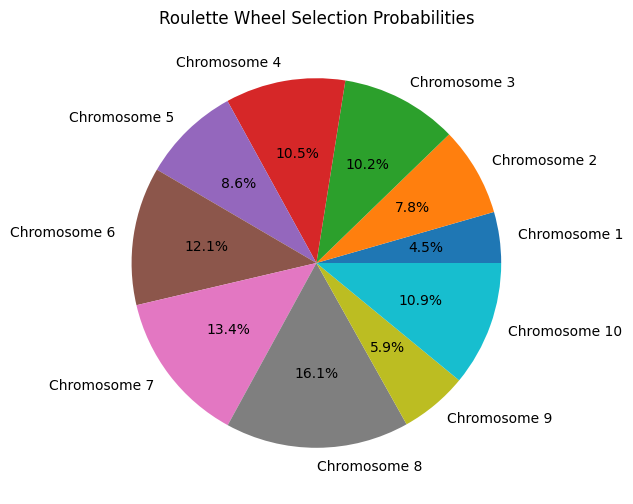


Step 6: Crossover
Parents: [ 2 14 20 10  7], [18  1  2 18  6] | Crossover Point: 4 | Children: [ 2 14 20 10  6], [18  1  2 18  7]
Parents: [ 8 28 20 17  4], [26 24 26  8 30] | Crossover Point: 2 | Children: [ 8 28 26  8 30], [26 24 20 17  4]
Parents: [20 13 25 13  0], [ 2 14 20 10  7] | Crossover Point: 1 | Children: [20 14 20 10  7], [ 2 13 25 13  0]
Parents: [20 13 25 13  0], [17 12 16 17  8] | Crossover Point: 1 | Children: [20 12 16 17  8], [17 13 25 13  0]
No Crossover for Parents: [[ 1 11  2  0 23]
 [20 13 25 13  0]]

Step 7: Mutation
Chromosome[7] Gene[4] Mutated: 8 -> 30

Final Best Chromosome: [18  1  2 18  7]
Final Fitness Value: 0.011904761904761904
Final Objective Value: 83

Generation 2
Step 3: Current Population
Chromosome[1] = [ 2 14 20 10  6] | Fitness = 0.0090
Chromosome[2] = [18  1  2 18  7] | Fitness = 0.0119
Chromosome[3] = [ 8 28 26  8 30] | Fitness = 0.0036
Chromosome[4] = [26 24 20 17  4] | Fitness = 0.0058
Chromosome[5] = [20 14 20 10  7] | Fitness = 0.0075
Chr

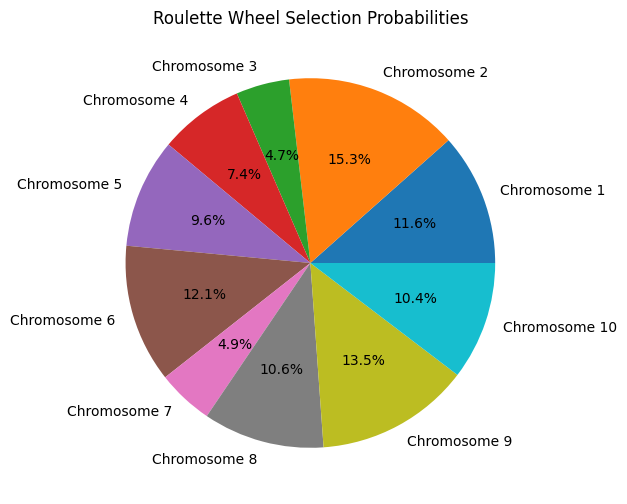


Step 6: Crossover
Parents: [20 13 25 13  0], [20 14 20 10  7] | Crossover Point: 4 | Children: [20 13 25 13  7], [20 14 20 10  0]
Parents: [18  1  2 18  7], [17 13 25 13  0] | Crossover Point: 1 | Children: [18 13 25 13  0], [17  1  2 18  7]
No Crossover for Parents: [[18  1  2 18  7]
 [17 13 25 13  0]]
Parents: [17 13 25 13  0], [20 14 20 10  7] | Crossover Point: 2 | Children: [17 13 20 10  7], [20 14 25 13  0]
Parents: [20 12 16 17 30], [ 2 13 25 13  0] | Crossover Point: 4 | Children: [20 12 16 17  0], [ 2 13 25 13 30]

Step 7: Mutation
Chromosome[9] Gene[4] Mutated: 0 -> 16

Final Best Chromosome: [17  1  2 18  7]
Final Fitness Value: 0.012048192771084338
Final Objective Value: 82

Generation 3
Step 3: Current Population
Chromosome[1] = [20 13 25 13  7] | Fitness = 0.0063
Chromosome[2] = [20 14 20 10  0] | Fitness = 0.0101
Chromosome[3] = [18 13 25 13  0] | Fitness = 0.0082
Chromosome[4] = [17  1  2 18  7] | Fitness = 0.0120
Chromosome[5] = [18  1  2 18  7] | Fitness = 0.0119
Chr

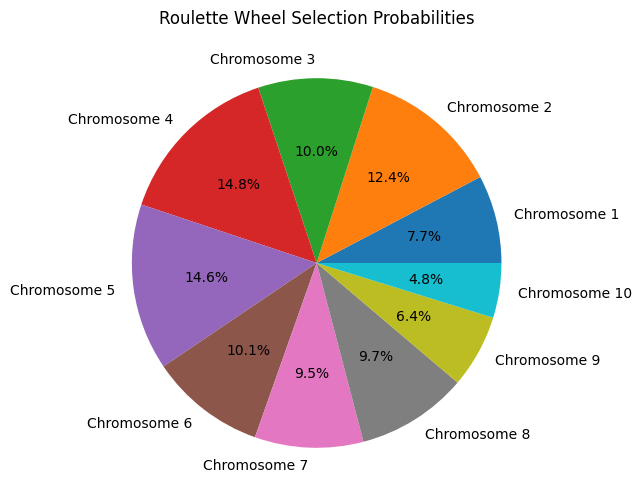


Step 6: Crossover
Parents: [18  1  2 18  7], [17 13 25 13  0] | Crossover Point: 4 | Children: [18  1  2 18  0], [17 13 25 13  7]
Parents: [20 14 20 10  0], [17  1  2 18  7] | Crossover Point: 4 | Children: [20 14 20 10  7], [17  1  2 18  0]
Parents: [17  1  2 18  7], [18 13 25 13  0] | Crossover Point: 2 | Children: [17  1 25 13  0], [18 13  2 18  7]
No Crossover for Parents: [[20 14 25 13  0]
 [20 14 25 13  0]]
No Crossover for Parents: [[17  1  2 18  7]
 [17  1  2 18  7]]

Step 7: Mutation

Final Best Chromosome: [17  1  2 18  0]
Final Fitness Value: 0.020833333333333332
Final Objective Value: 47

Generation 4
Step 3: Current Population
Chromosome[1] = [18  1  2 18  0] | Fitness = 0.0204
Chromosome[2] = [17 13 25 13  7] | Fitness = 0.0064
Chromosome[3] = [20 14 20 10  7] | Fitness = 0.0075
Chromosome[4] = [17  1  2 18  0] | Fitness = 0.0208
Chromosome[5] = [17  1 25 13  0] | Fitness = 0.0103
Chromosome[6] = [18 13  2 18  7] | Fitness = 0.0093
Chromosome[7] = [20 14 25 13  0] | Fitn

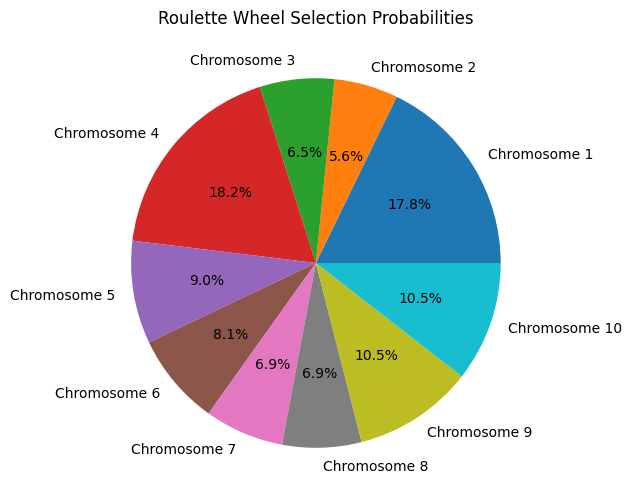


Step 6: Crossover
Parents: [17 13 25 13  7], [18  1  2 18  0] | Crossover Point: 4 | Children: [17 13 25 13  0], [18  1  2 18  7]
Parents: [17  1  2 18  0], [20 14 25 13  0] | Crossover Point: 1 | Children: [17 14 25 13  0], [20  1  2 18  0]
Parents: [20 14 25 13  0], [20 14 20 10  7] | Crossover Point: 3 | Children: [20 14 25 10  7], [20 14 20 13  0]
Parents: [17  1  2 18  7], [17  1  2 18  0] | Crossover Point: 2 | Children: [17  1  2 18  0], [17  1  2 18  7]
Parents: [17  1  2 18  0], [18 13  2 18  7] | Crossover Point: 1 | Children: [17 13  2 18  7], [18  1  2 18  0]

Step 7: Mutation
Chromosome[1] Gene[4] Mutated: 0 -> 1
Chromosome[7] Gene[2] Mutated: 2 -> 1

Final Best Chromosome: [17  1  1 18  0]
Final Fitness Value: 0.022222222222222223
Final Objective Value: 44

Generation 5
Step 3: Current Population
Chromosome[1] = [17 13 25 13  1] | Fitness = 0.0079
Chromosome[2] = [18  1  2 18  7] | Fitness = 0.0119
Chromosome[3] = [17 14 25 13  0] | Fitness = 0.0081
Chromosome[4] = [20  

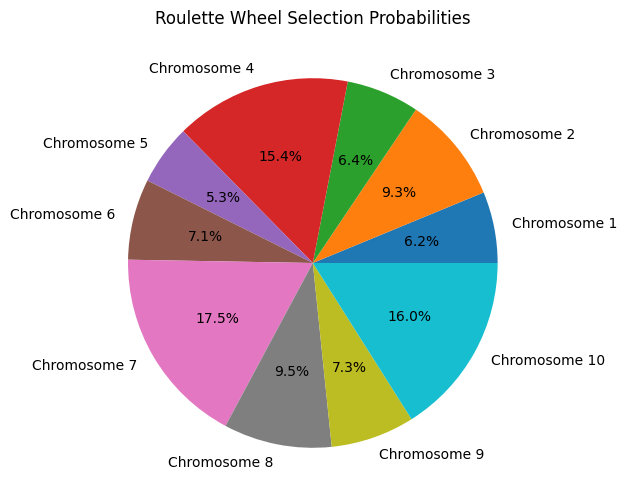


Step 6: Crossover
Parents: [18  1  2 18  0], [17 14 25 13  0] | Crossover Point: 1 | Children: [18 14 25 13  0], [17  1  2 18  0]
Parents: [20  1  2 18  0], [17 13 25 13  1] | Crossover Point: 4 | Children: [20  1  2 18  1], [17 13 25 13  0]
Parents: [17  1  1 18  0], [17 13 25 13  1] | Crossover Point: 4 | Children: [17  1  1 18  1], [17 13 25 13  0]
Parents: [17 13 25 13  1], [17  1  2 18  7] | Crossover Point: 3 | Children: [17 13 25 18  7], [17  1  2 13  1]
Parents: [17  1  1 18  0], [17  1  1 18  0] | Crossover Point: 2 | Children: [17  1  1 18  0], [17  1  1 18  0]

Step 7: Mutation
Chromosome[7] Gene[3] Mutated: 18 -> 2
Chromosome[9] Gene[0] Mutated: 17 -> 26

Final Best Chromosome: [17  1  2 13  1]
Final Fitness Value: 0.030303030303030304
Final Objective Value: 32

Generation 6
Step 3: Current Population
Chromosome[1] = [18 14 25 13  0] | Fitness = 0.0081
Chromosome[2] = [17  1  2 18  0] | Fitness = 0.0208
Chromosome[3] = [20  1  2 18  1] | Fitness = 0.0179
Chromosome[4] = [1

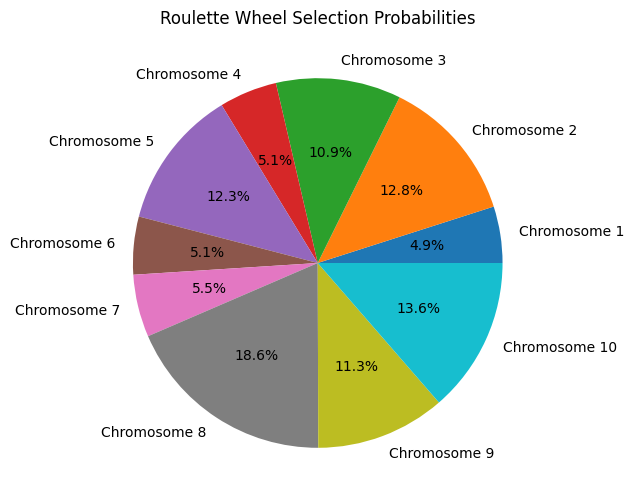


Step 6: Crossover
Parents: [17 13 25 13  0], [17 13 25 13  0] | Crossover Point: 3 | Children: [17 13 25 13  0], [17 13 25 13  0]
No Crossover for Parents: [[17  1  2 18  0]
 [17  1  1 18  0]]
Parents: [20  1  2 18  1], [17  1  1 18  0] | Crossover Point: 3 | Children: [20  1  2 18  0], [17  1  1 18  1]
Parents: [17  1  2 18  0], [17  1  2 13  1] | Crossover Point: 1 | Children: [17  1  2 13  1], [17  1  2 18  0]
Parents: [17 13 25  2  7], [17  1  1 18  0] | Crossover Point: 4 | Children: [17 13 25  2  0], [17  1  1 18  7]

Step 7: Mutation
Chromosome[1] Gene[1] Mutated: 13 -> 15
Chromosome[4] Gene[2] Mutated: 1 -> 27
Chromosome[10] Gene[0] Mutated: 17 -> 18

Final Best Chromosome: [17  1  2 13  1]
Final Fitness Value: 0.030303030303030304
Final Objective Value: 32

Generation 7
Step 3: Current Population
Chromosome[1] = [17 15 25 13  0] | Fitness = 0.0080
Chromosome[2] = [17 13 25 13  0] | Fitness = 0.0083
Chromosome[3] = [17  1  2 18  0] | Fitness = 0.0208
Chromosome[4] = [17  1 27 

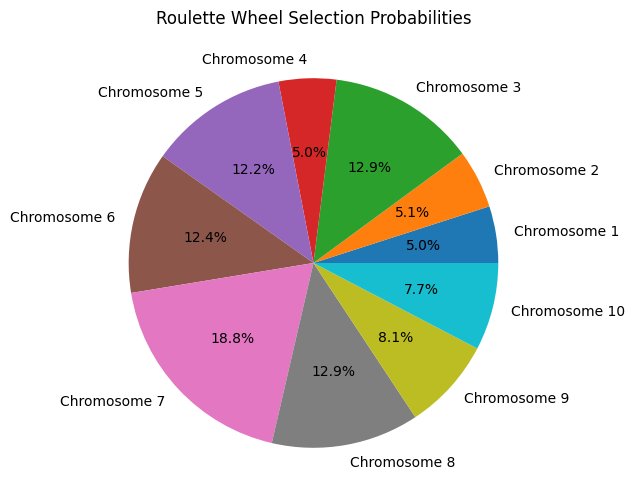


Step 6: Crossover
Parents: [17 13 25  2  0], [20  1  2 18  0] | Crossover Point: 2 | Children: [17 13  2 18  0], [20  1 25  2  0]
Parents: [17  1  2 18  0], [17  1  2 13  1] | Crossover Point: 3 | Children: [17  1  2 13  1], [17  1  2 18  0]
Parents: [17  1  2 18  0], [17  1  2 18  0] | Crossover Point: 2 | Children: [17  1  2 18  0], [17  1  2 18  0]
Parents: [17 13 25 13  0], [17  1  1 18  1] | Crossover Point: 3 | Children: [17 13 25 18  1], [17  1  1 13  0]
No Crossover for Parents: [[17  1  1 18  1]
 [17  1  2 13  1]]

Step 7: Mutation
Chromosome[5] Gene[0] Mutated: 17 -> 9

Final Best Chromosome: [17  1  1 13  0]
Final Fitness Value: 0.04
Final Objective Value: 24

Generation 8
Step 3: Current Population
Chromosome[1] = [17 13  2 18  0] | Fitness = 0.0139
Chromosome[2] = [20  1 25  2  0] | Fitness = 0.0179
Chromosome[3] = [17  1  2 13  1] | Fitness = 0.0303
Chromosome[4] = [17  1  2 18  0] | Fitness = 0.0208
Chromosome[5] = [ 9  1  2 18  0] | Fitness = 0.0250
Chromosome[6] = [17

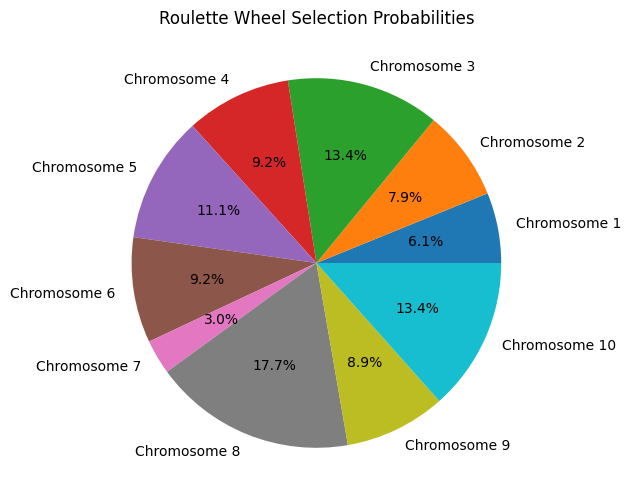


Step 6: Crossover
Parents: [20  1 25  2  0], [20  1 25  2  0] | Crossover Point: 3 | Children: [20  1 25  2  0], [20  1 25  2  0]
Parents: [17  1  2 13  1], [17 13  2 18  0] | Crossover Point: 3 | Children: [17  1  2 18  0], [17 13  2 13  1]
Parents: [17  1  2 13  1], [17  1  1 13  0] | Crossover Point: 1 | Children: [17  1  1 13  0], [17  1  2 13  1]
No Crossover for Parents: [[17  1  2 13  1]
 [ 9  1  2 18  0]]
No Crossover for Parents: [[17  1  2 18  0]
 [17  1  1 18  1]]

Step 7: Mutation

Final Best Chromosome: [17  1  1 13  0]
Final Fitness Value: 0.04
Final Objective Value: 24

Generation 9
Step 3: Current Population
Chromosome[1] = [20  1 25  2  0] | Fitness = 0.0179
Chromosome[2] = [20  1 25  2  0] | Fitness = 0.0179
Chromosome[3] = [17  1  2 18  0] | Fitness = 0.0208
Chromosome[4] = [17 13  2 13  1] | Fitness = 0.0175
Chromosome[5] = [17  1  1 13  0] | Fitness = 0.0400
Chromosome[6] = [17  1  2 13  1] | Fitness = 0.0303
Chromosome[7] = [17  1  2 13  1] | Fitness = 0.0303
Chr

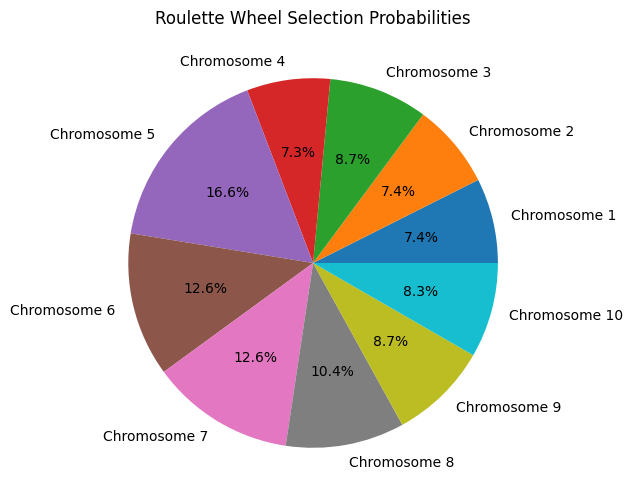


Step 6: Crossover
Parents: [17  1  1 13  0], [ 9  1  2 18  0] | Crossover Point: 1 | Children: [17  1  2 18  0], [ 9  1  1 13  0]
Parents: [17  1  1 13  0], [17  1  2 13  1] | Crossover Point: 4 | Children: [17  1  1 13  1], [17  1  2 13  0]
Parents: [17  1  2 13  1], [20  1 25  2  0] | Crossover Point: 2 | Children: [17  1 25  2  0], [20  1  2 13  1]
Parents: [ 9  1  2 18  0], [ 9  1  2 18  0] | Crossover Point: 3 | Children: [ 9  1  2 18  0], [ 9  1  2 18  0]
Parents: [17  1  1 18  1], [17  1  1 18  1] | Crossover Point: 2 | Children: [17  1  1 18  1], [17  1  1 18  1]

Step 7: Mutation
Chromosome[5] Gene[3] Mutated: 2 -> 7
Chromosome[7] Gene[2] Mutated: 2 -> 15
Chromosome[10] Gene[2] Mutated: 1 -> 16

Final Best Chromosome: [ 9  1  1 13  0]
Final Fitness Value: 0.058823529411764705
Final Objective Value: 16

Generation 10
Step 3: Current Population
Chromosome[1] = [17  1  2 18  0] | Fitness = 0.0208
Chromosome[2] = [ 9  1  1 13  0] | Fitness = 0.0588
Chromosome[3] = [17  1  1 13  1

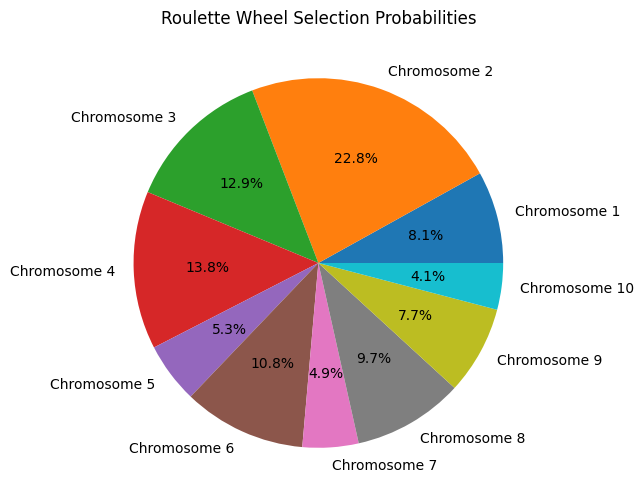


Step 6: Crossover
Parents: [17  1 16 18  1], [20  1  2 13  1] | Crossover Point: 2 | Children: [17  1  2 13  1], [20  1 16 18  1]
Parents: [ 9  1  1 13  0], [17  1  2 18  0] | Crossover Point: 4 | Children: [ 9  1  1 13  0], [17  1  2 18  0]
No Crossover for Parents: [[ 9  1  1 13  0]
 [20  1  2 13  1]]
Parents: [17  1  1 13  1], [ 9  1  1 13  0] | Crossover Point: 4 | Children: [17  1  1 13  0], [ 9  1  1 13  1]
Parents: [17  1  2 13  0], [ 9  1  1 13  0] | Crossover Point: 1 | Children: [17  1  1 13  0], [ 9  1  2 13  0]

Step 7: Mutation

Final Best Chromosome: [ 9  1  1 13  0]
Final Fitness Value: 0.058823529411764705
Final Objective Value: 16


In [8]:
# Run the Genetic Algorithm
genetic_algorithm()